In [1]:
%cd ../

/home/ksridhar/PoE-robustness/standard-training


In [2]:
# Train models 
import torch
import os
batch_sizes = [64, 128, 256, 512, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]

fractions_SAT = []
for model in ['resnet20', 'resnet50']:
    batches = batch_sizes[0:19] if '20' in model else batch_sizes[0:14]
    LRs = [0.1, 0.5672, 0.2836] if '20' in model else [0.1, 0.1852, 0.0926]
    for LR in LRs:
        temp = []
        for B in batches:
            os.system('python train_model.py --folder train_checkpoints/assumption/{}_cifar10_'.format(B)+model+'_{}'.format(LR))

In [3]:
# Evaluate assumption
import torch
batch_sizes = [64, 128, 256, 512, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]

fractions_SAT = []
for model in ['resnet20', 'resnet50']:
    batches = batch_sizes[0:19] if '20' in model else batch_sizes[0:14]
    LRs = [0.1, 0.5672, 0.2836] if '20' in model else [0.1, 0.1852, 0.0926]
    for LR in LRs:
        temp = []
        for B in batches:
            load_file_loc = 'train_checkpoints/assumption/{}_cifar10_'.format(B)+model+'_{}'.format(LR)+'/checkpoint.pth.tar'
            checkpoint = torch.load(load_file_loc)
            Lipschitz = checkpoint['Lipschitz']
            print(load_file_loc)
            temp.append(Lipschitz.track_assumption_directly(print_info=False))
        fractions_SAT.append(temp)

train_checkpoints/assumption/64_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/128_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/256_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/512_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/1000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/2000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/3000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/4000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/5000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/6000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/7000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/8000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/9000_cifar10_resnet20_0.1/checkpoint.pth.tar
train_checkpoints/assumption/10000_cifar10_

Text(0, 0.5, 'Fraction of total epochs\nsatisfying Assumption 2')

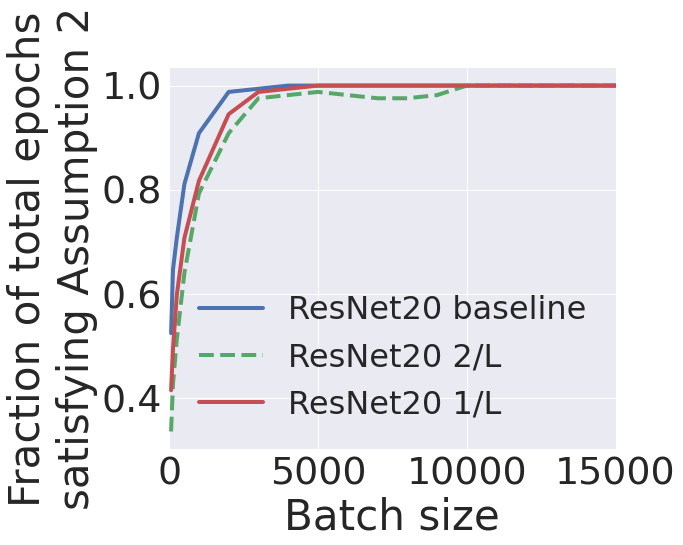

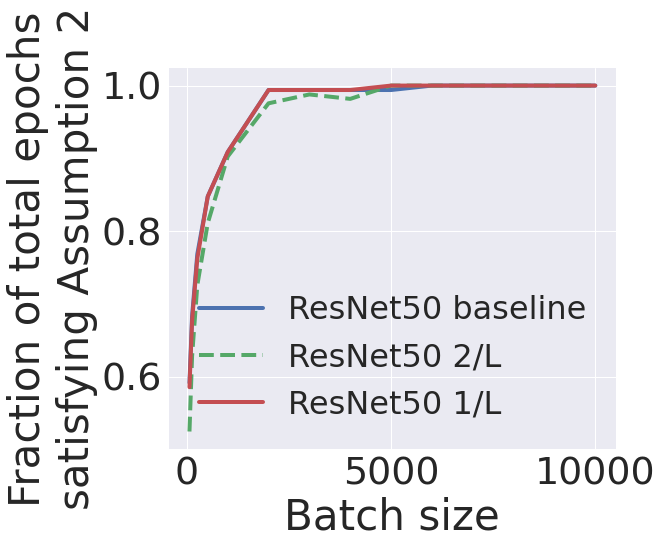

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=42)     # fontsize of the axes title
plt.rc('axes', labelsize=42)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=38)    # fontsize of the tick labels
plt.rc('ytick', labelsize=38)    # fontsize of the tick labels
plt.rc('legend', fontsize=32)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title

plt.figure(1, figsize=(8,7))
plt.plot(batch_sizes, fractions_SAT[0], linestyle = '-', linewidth=4.0) 
plt.plot(batch_sizes, fractions_SAT[1], linestyle = '--', linewidth=4.0)
plt.plot(batch_sizes, fractions_SAT[2], linestyle = '-', linewidth=4.0)
plt.legend(['ResNet20 baseline', 'ResNet20 2/L', 'ResNet20 1/L'], loc='lower right')
plt.xlabel('Batch size')
plt.ylabel('Fraction of total epochs\nsatisfying Assumption 2')
#plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlim([0,15000])

plt.figure(2, figsize=(8,7))
plt.plot(batch_sizes[0:14], fractions_SAT[3], linestyle = '-', linewidth=4.0)
plt.plot(batch_sizes[0:14], fractions_SAT[4], linestyle = '--', linewidth=4.0)
plt.plot(batch_sizes[0:14], fractions_SAT[5], linestyle = '-', linewidth=4.0)
plt.legend(['ResNet50 baseline', 'ResNet50 2/L', 'ResNet50 1/L'], loc='lower right')

plt.xlabel('Batch size')
plt.ylabel('Fraction of total epochs\nsatisfying Assumption 2')
#plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees